In [1]:
import resources.Get_Vectorised_Data as Get_Vectorised_Data
from resources.single_data.RF_AR import RF_AR
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  2 of 2 completed
make_diff()
                ^GSPC       ^IXIC
Date                             
2021-01-04 -55.420166 -189.830078
2021-01-05  26.210205  120.509766
2021-01-06  21.279785  -78.169922
2021-01-07  55.650146  326.690430
2021-01-08  20.889893  134.500000
...               ...         ...
2022-03-21  -1.939941  -55.379883
2022-03-22  50.429688  270.360352
2022-03-23 -55.369629 -186.220703
2022-03-24  63.919922  269.240234
2022-03-25  22.899902  -22.540039

[310 rows x 2 columns]


In [2]:
szereg = Get_Vectorised_Data.Get_Vectorised_Data(["CL=F", "^IXIC", "^GSPC", "EURUSD=X", "GC=F"], start="2021-09-20", end='2022-01-20', interval="1d").make_diff()
#szereg = pd.read_csv("sim.csv")['x'][:300]
#getter.analiza_statystyczna_szeregu(szereg_pandas=szereg)
szereg.dropna(how='any', inplace=True)
print(szereg.isna().sum())
szereg

[*********************100%***********************]  5 of 5 completed
make_diff()
CL=F        0
EURUSD=X    0
GC=F        0
^GSPC       0
^IXIC       0
dtype: int64


,CL=F,EURUSD=X,GC=F,^GSPC,^IXIC
Date,,,,,
2021-09-21,0.269997,0.000027,14.199951,-3.540039,32.500000
2021-09-22,1.670006,-0.000729,0.699951,41.450195,150.449219
2021-09-23,1.070000,-0.003521,-29.000000,53.339844,155.390625
2021-09-24,0.680000,0.005255,2.000000,6.500000,-4.540039
2021-09-27,1.469994,-0.001720,0.300049,-12.370117,-77.730469
...,...,...,...,...,...
2022-01-11,2.989998,-0.002354,20.199951,42.779785,210.620117
2022-01-12,1.419998,0.003606,8.599976,13.280273,34.939453
2022-01-13,-0.519997,0.007517,-6.000000,-67.320312,-381.580078


Dalej


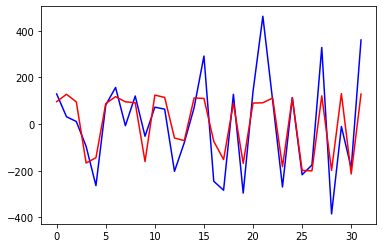

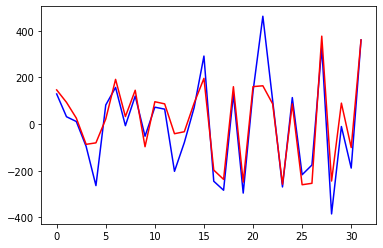

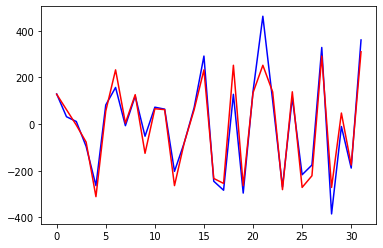

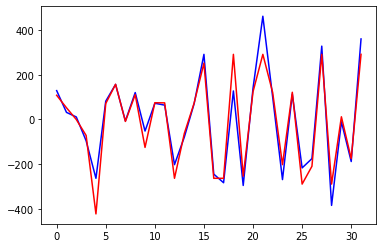

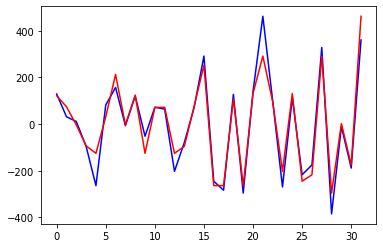

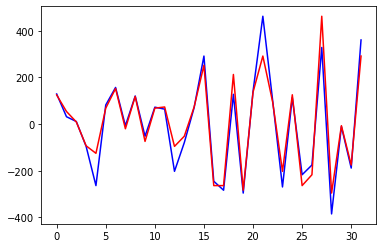

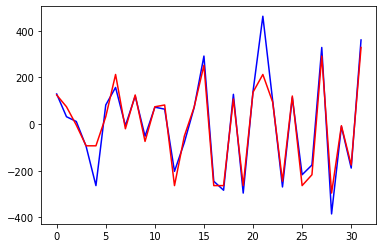

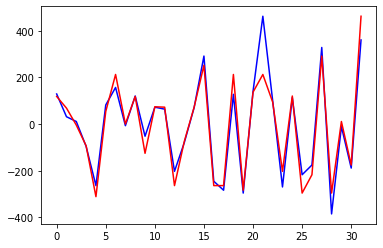

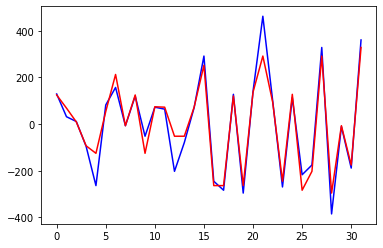

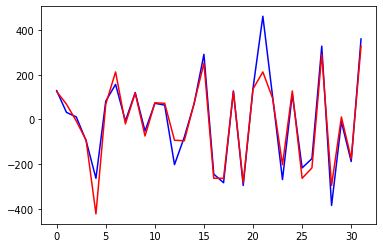

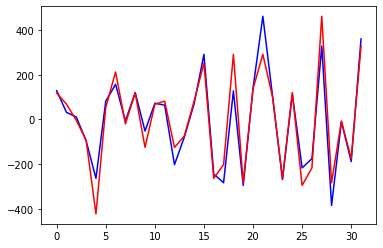

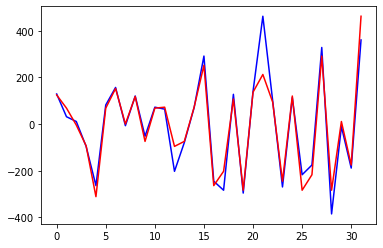

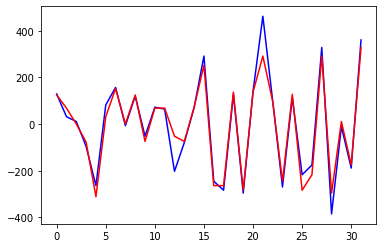

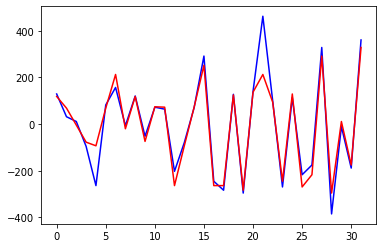

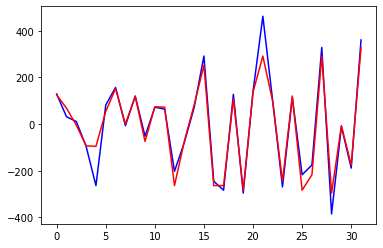

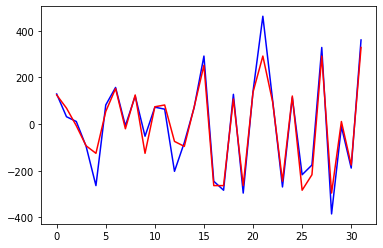

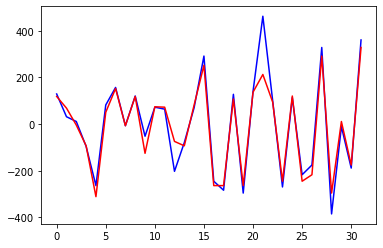

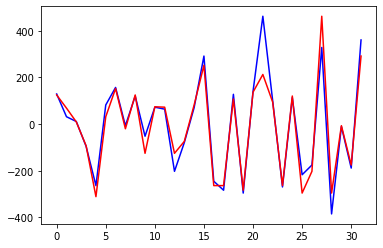

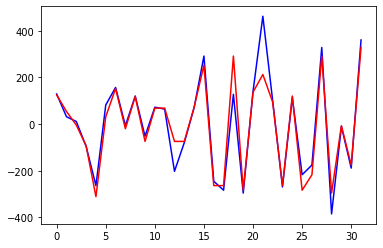

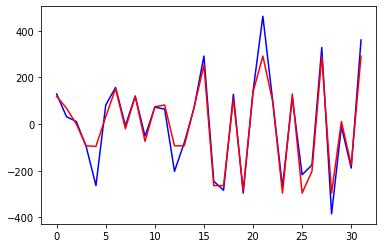

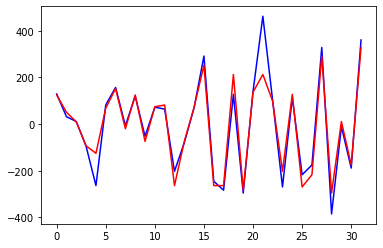

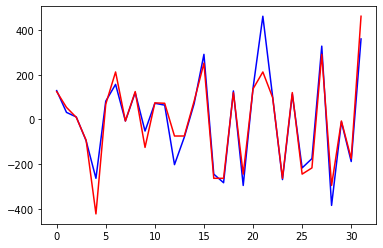

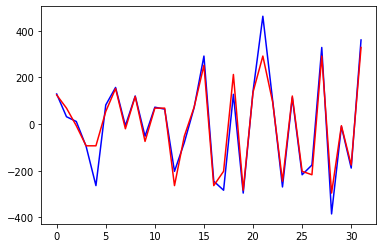

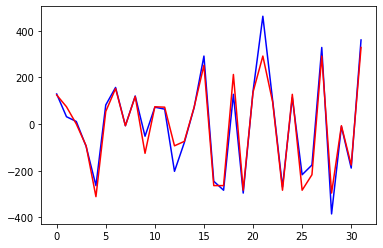

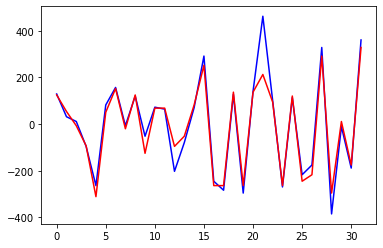

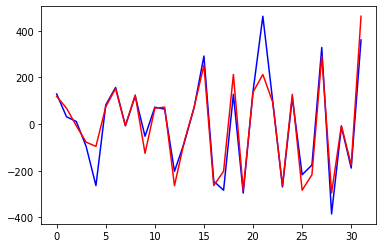

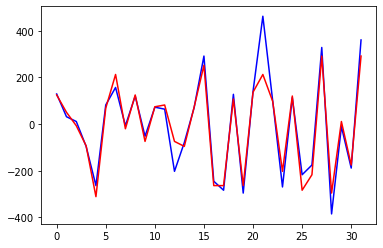

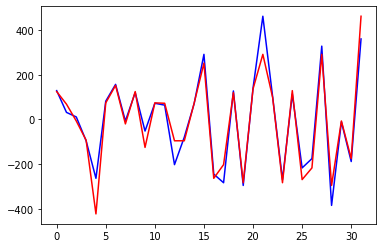

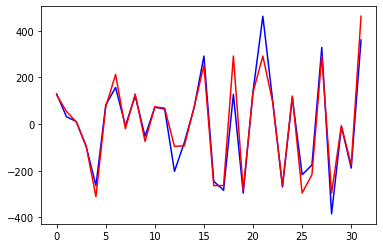

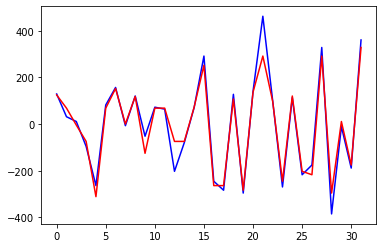

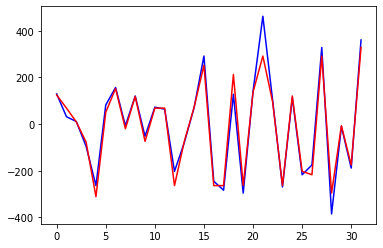

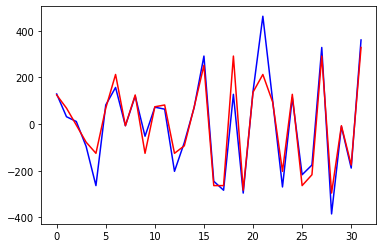

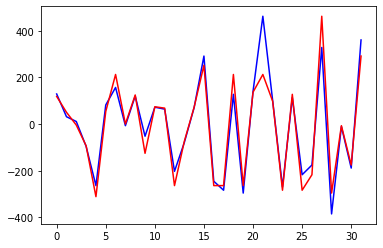

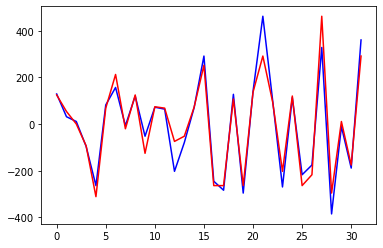

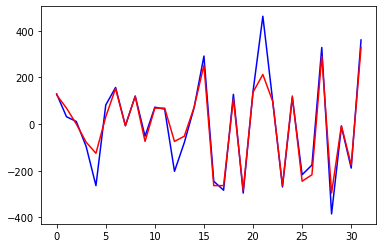

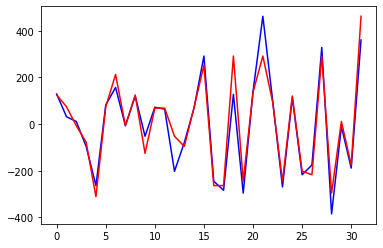

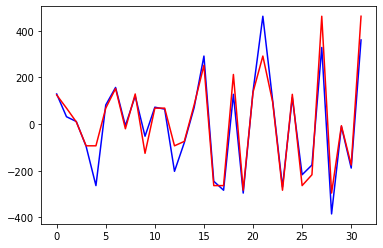

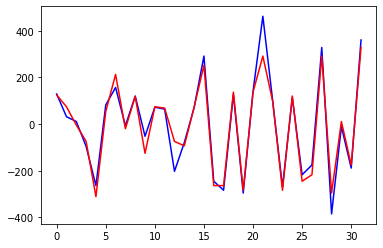

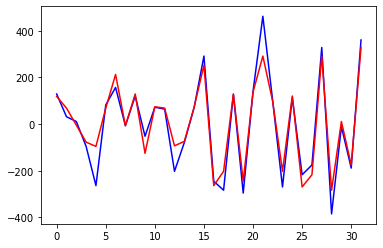

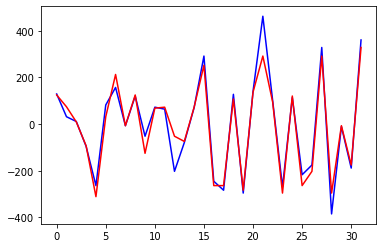

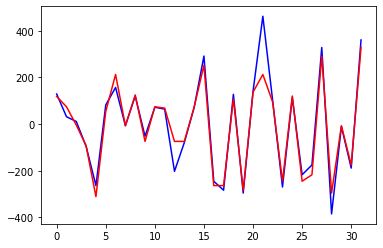

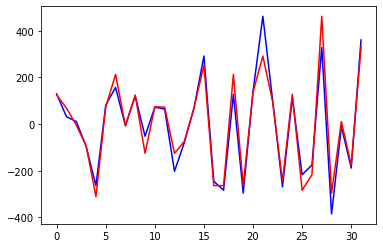

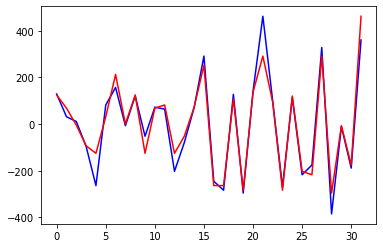

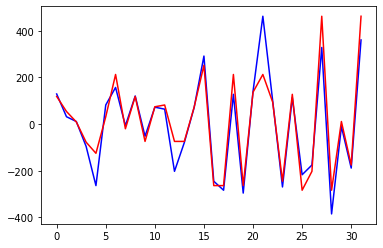

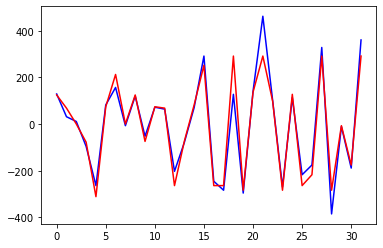

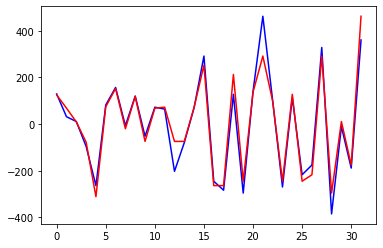

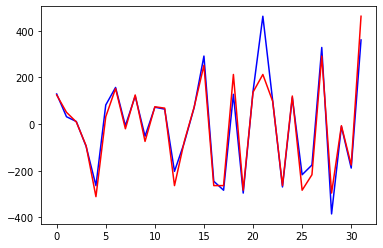

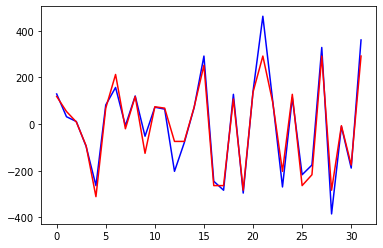

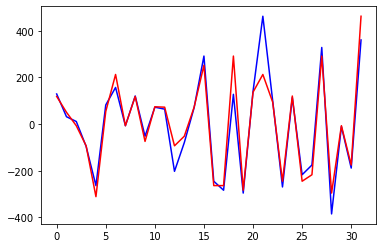

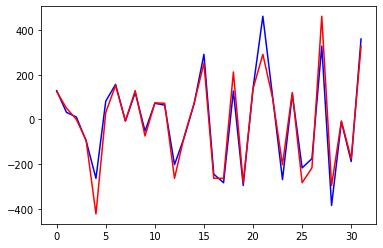

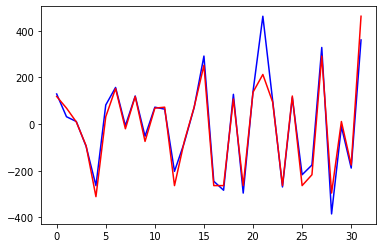

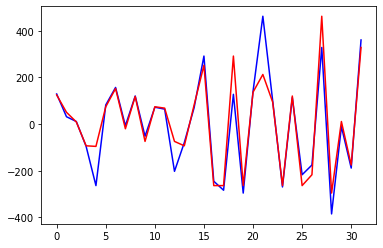

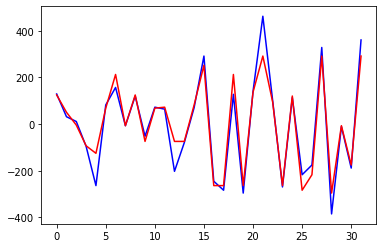

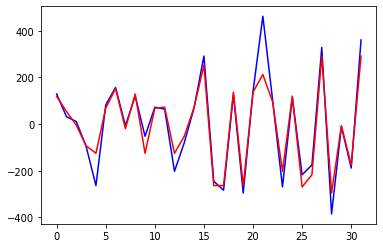

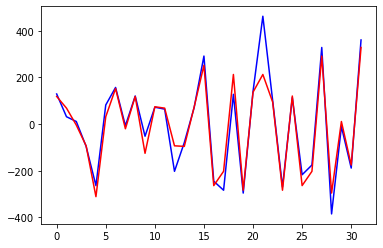

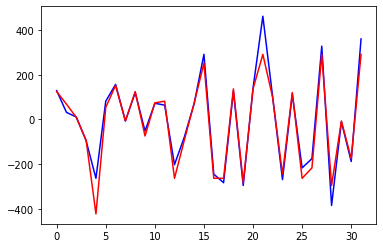

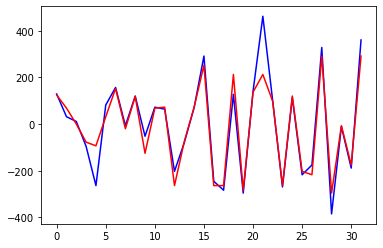

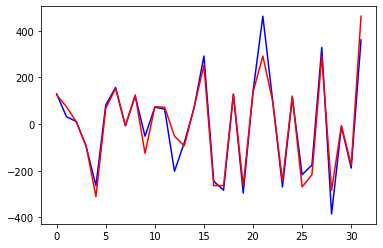

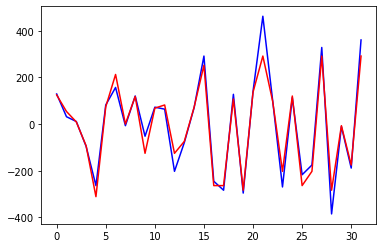

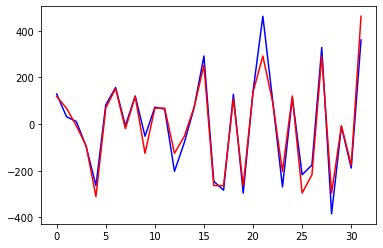

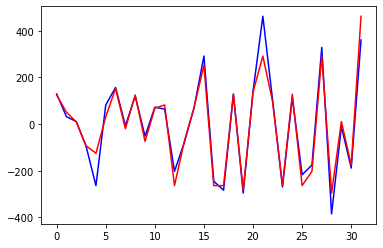

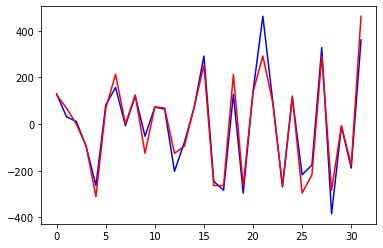

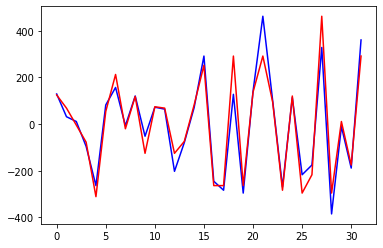

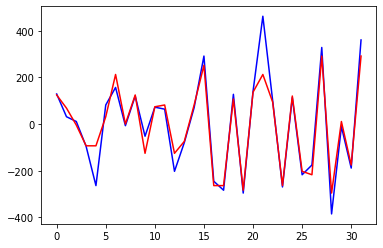

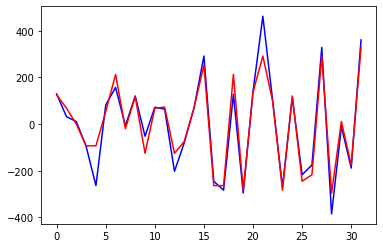

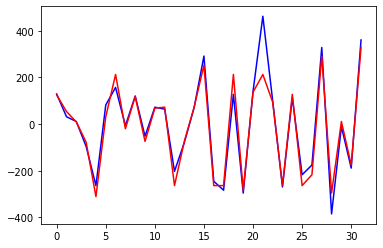

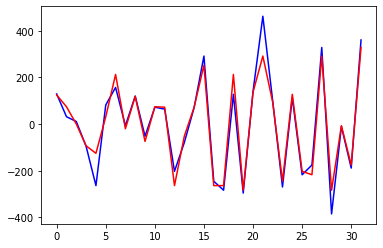

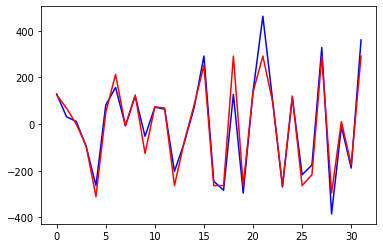

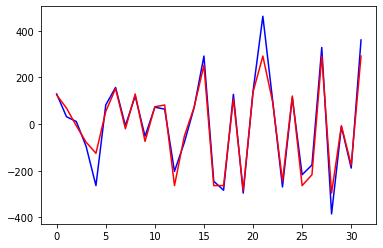

OPTYMALNA WARTOŚĆ PARAMETRU MAX_DEPTH:  31


In [3]:
cart_ar = CART_ARX(data=szereg, params={"lags": 1}, test_ratio=0.8, to_predict="^IXIC")
opt = cart_ar.cross_validation_rolling_window(dlugosc_okna=1/2, max_depth=70)

#cart_ar.fit(params_fit={"max_depth": opt})

In [4]:
cart_ar.fit(params_fit={"max_depth": opt})

{'max_depth': 31}
fit


16
16
forecast_raw
16
16
forecast_raw
16
16
forecast_raw
SUMA:  10  /  16


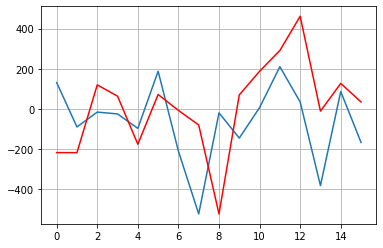

In [5]:
plt.plot(cart_ar.data_test["^IXIC"].values)
plt.plot(cart_ar.forecast_raw(), c='r')
plt.grid()

print("SUMA: ",sum(cart_ar.data_test["^IXIC"].values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))